In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [90]:
data = pd.read_csv("corrected_dogs_dataset.csv")
data

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,Венгерская короткошерстая легавая (выжлы),False,75000,0.5,12,6,собака,Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,Лабрадор ретривер,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",Санкт-Петербург,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,Чихуахуа,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,Москва,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,Такса (Дексхунд),False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,Москва,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...
...,...,...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,Йоркшир терьер,False,20000,0.5,15,77,Мальчик шокомерле от красивой пары. Активный н...,Санкт-Петербург,13.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/c7/...
1156,Щенки вельш корги кардиган,Вельш корги кардиган (корги кардиган),True,50000,0.5,12,263,Стандартные щенки вельш корги кардиган от чемп...,Санкт-Петербург,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/6e/...
1157,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/e9/...
1158,Щенки веймаранера,Веймаранер (веймарская легавая),False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,Москва,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/13/...


In [4]:
data.shape

(1160, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1160 non-null   object 
 1   breed               1160 non-null   object 
 2   rare_gen            1160 non-null   bool   
 3   price               1160 non-null   int64  
 4   age                 1160 non-null   float64
 5   life_expectancy     1160 non-null   int64  
 6   description_length  1160 non-null   int64  
 7   description         1160 non-null   object 
 8   region              1160 non-null   object 
 9   date                1160 non-null   object 
 10  image_url           1160 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 91.9+ KB


In [6]:
data.nunique()

name                   765
breed                   91
rare_gen                 2
price                   80
age                     12
life_expectancy          7
description_length     201
description            864
region                  37
date                   528
image_url             1025
dtype: int64

In [9]:
data.describe()

,price,age,life_expectancy,description_length
count,1160.000000,1160.000000,1160.000000,1160.000000
mean,58884.512931,0.524655,12.655172,191.147414
std,68104.827294,0.639129,1.641268,91.858361
min,0.000000,0.200000,8.000000,1.000000
25%,25000.000000,0.500000,12.000000,125.000000
50%,50000.000000,0.500000,12.000000,253.000000
75%,70000.000000,0.500000,15.000000,260.000000
max,800000.000000,20.000000,15.000000,263.000000


In [10]:
data.isnull().sum()

name                  0
breed                 0
rare_gen              0
price                 0
age                   0
life_expectancy       0
description_length    0
description           0
region                0
date                  0
image_url             0
dtype: int64

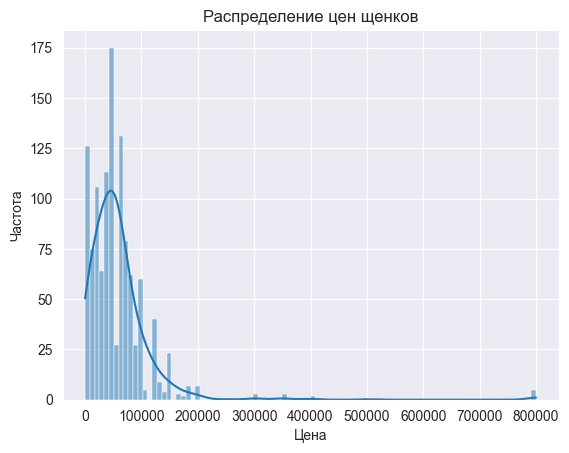

In [91]:
sns.histplot(data['price'], kde=True)
plt.title('Распределение цен щенков')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

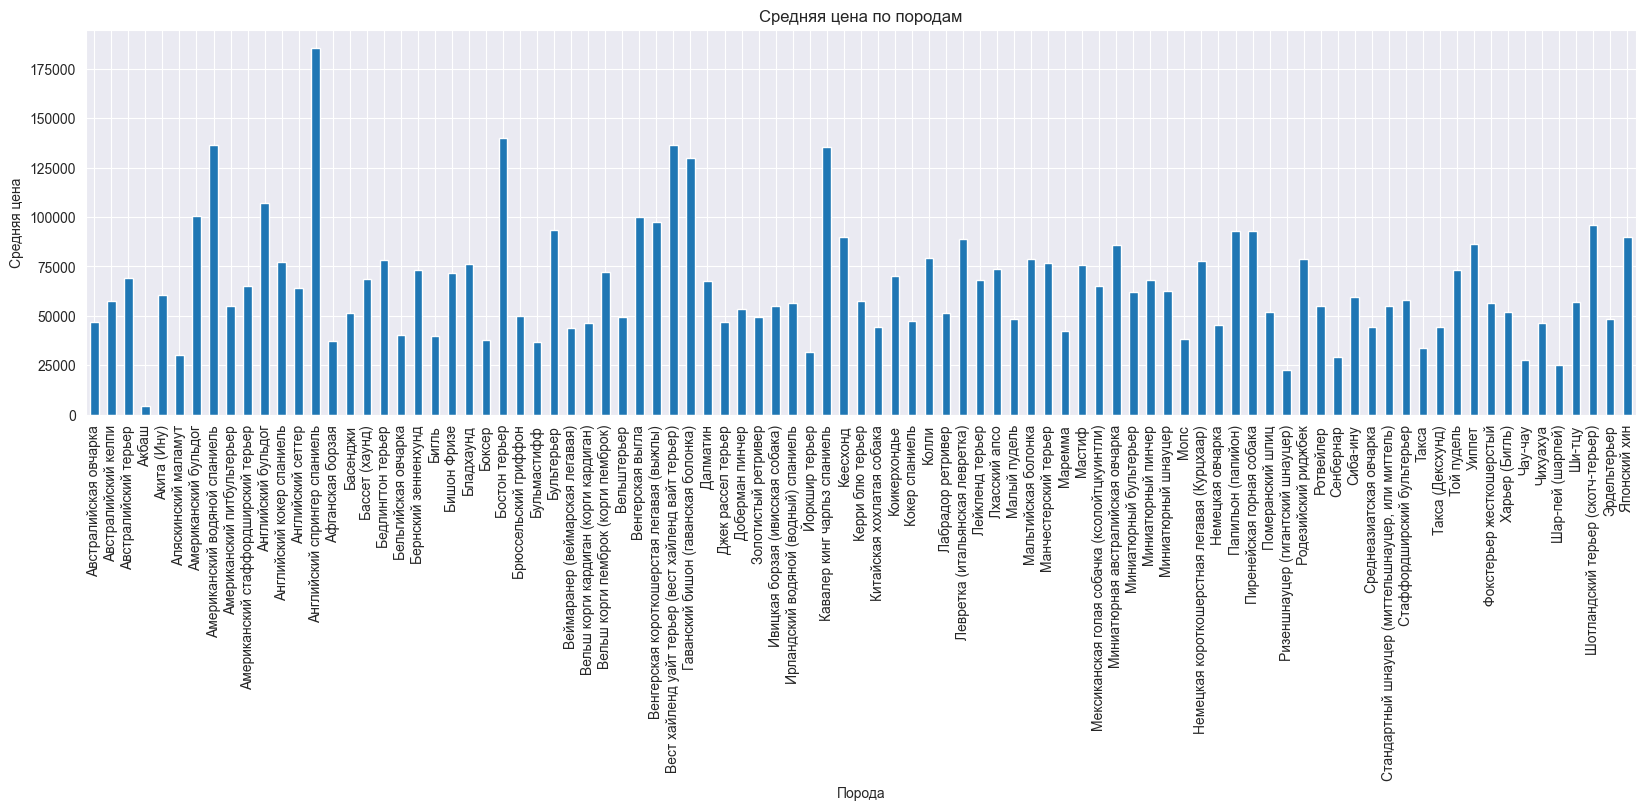

In [92]:
plt.figure(figsize=(20, 5))
breed_price = data.groupby('breed')['price'].mean()
breed_price.plot(kind='bar')
plt.title('Средняя цена по породам')
plt.xlabel('Порода')
plt.ylabel('Средняя цена')
plt.xticks(rotation=90)
plt.show()

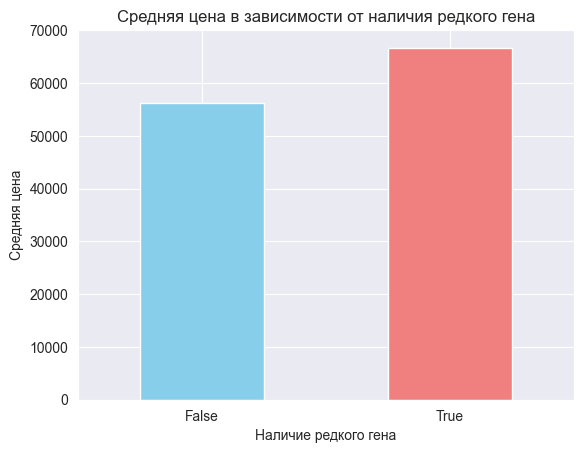

In [93]:
rare_gen_price = data.groupby('rare_gen')['price'].mean()
rare_gen_price.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Средняя цена в зависимости от наличия редкого гена')
plt.xlabel('Наличие редкого гена')
plt.ylabel('Средняя цена')
plt.xticks(rotation=0)
plt.show()

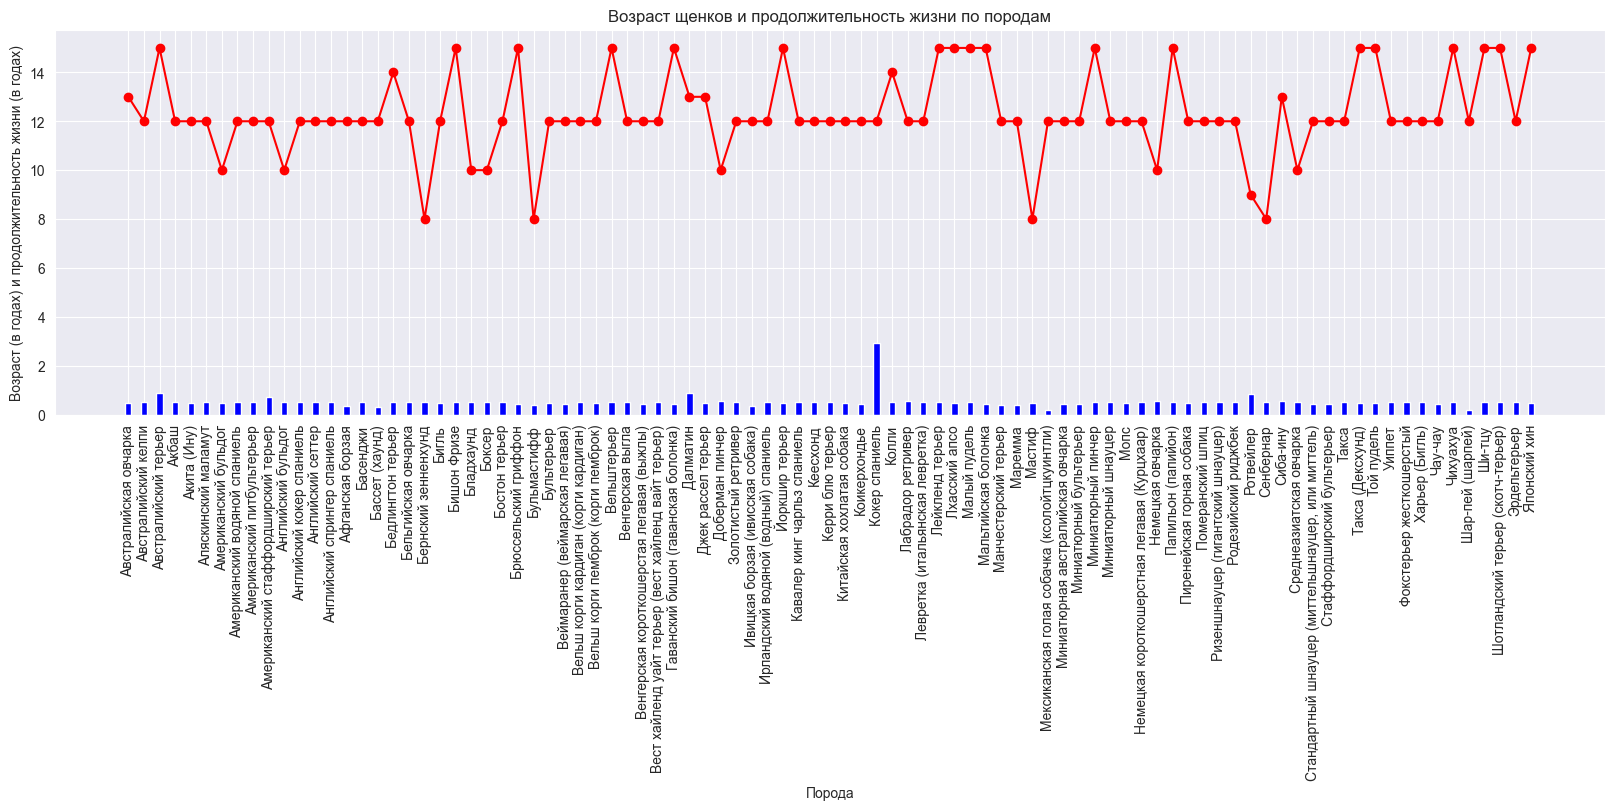

In [98]:
breed_age_life = data.groupby('breed').agg({'age': 'mean', 'life_expectancy': 'mean'}).reset_index()
plt.figure(figsize=(20, 5))
plt.bar(breed_age_life['breed'], breed_age_life['age'], width=0.4, label='Средний возраст', color='b', align='center')
plt.plot(breed_age_life['breed'], breed_age_life['life_expectancy'], label='Продолжительность жизни', color='r', marker='o')
plt.title('Возраст щенков и продолжительность жизни по породам')
plt.xlabel('Порода')
plt.ylabel('Возраст (в годах) и продолжительность жизни (в годах)')
plt.xticks(rotation=90)
plt.show()

In [99]:
label_encoder = LabelEncoder()
data['breed'] = label_encoder.fit_transform(data['breed'])
data['region'] = label_encoder.fit_transform(data['region'])
# преобразуем категориальные переменные в числовые (только те, что будут использоваться далее)
data

,name,breed,rare_gen,price,age,life_expectancy,description_length,description,region,date,image_url
0,Щенки венгерской выжлы,33,False,75000,0.5,12,6,собака,26,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/43/...
1,Щенки венгерской выжлы,33,False,75000,0.5,12,6,собака,26,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/33/...
2,Самый Красивый мальчик Рокки ищет,50,False,15000,0.4,12,189,"2.5 месяца... Добрый,игривый очень ласковый.. ...",26,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/17/...
3,Щенки Чихуахуа,85,True,12000,0.5,15,250,Чихуахуа щенки короткошерстные и длинношерстны...,14,25.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/73/...
4,Такса жесткошерстная - щенки питомника,79,False,60000,0.5,15,260,Племенной питомник РКФ &quotИз Ново-Переделкин...,14,20.11.2024,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/4e/...
...,...,...,...,...,...,...,...,...,...,...,...
1155,Мальчики шоколадные мраморные,42,False,20000,0.5,15,77,Мальчик шокомерле от красивой пары. Активный н...,26,13.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/c7/...
1156,Щенки вельш корги кардиган,29,True,50000,0.5,12,263,Стандартные щенки вельш корги кардиган от чемп...,26,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/6e/...
1157,Щенки веймаранера,28,False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,14,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/e9/...
1158,Щенки веймаранера,28,False,60000,0.5,12,252,Предлагаются к продаже щенки веймаранера Дата ...,14,12.06.2022,//6kcmxu3d7l.a.trbcdn.net/upload/files-new/13/...


In [100]:
data['price_category'] = data['price'].apply(lambda x: 1 if x > 50000 else 0)
# создадим новую переменную

In [101]:
X = data[['breed', 'age', 'rare_gen', 'description_length', 'region']]
y = data['price_category']
# признаки и целевая переменная

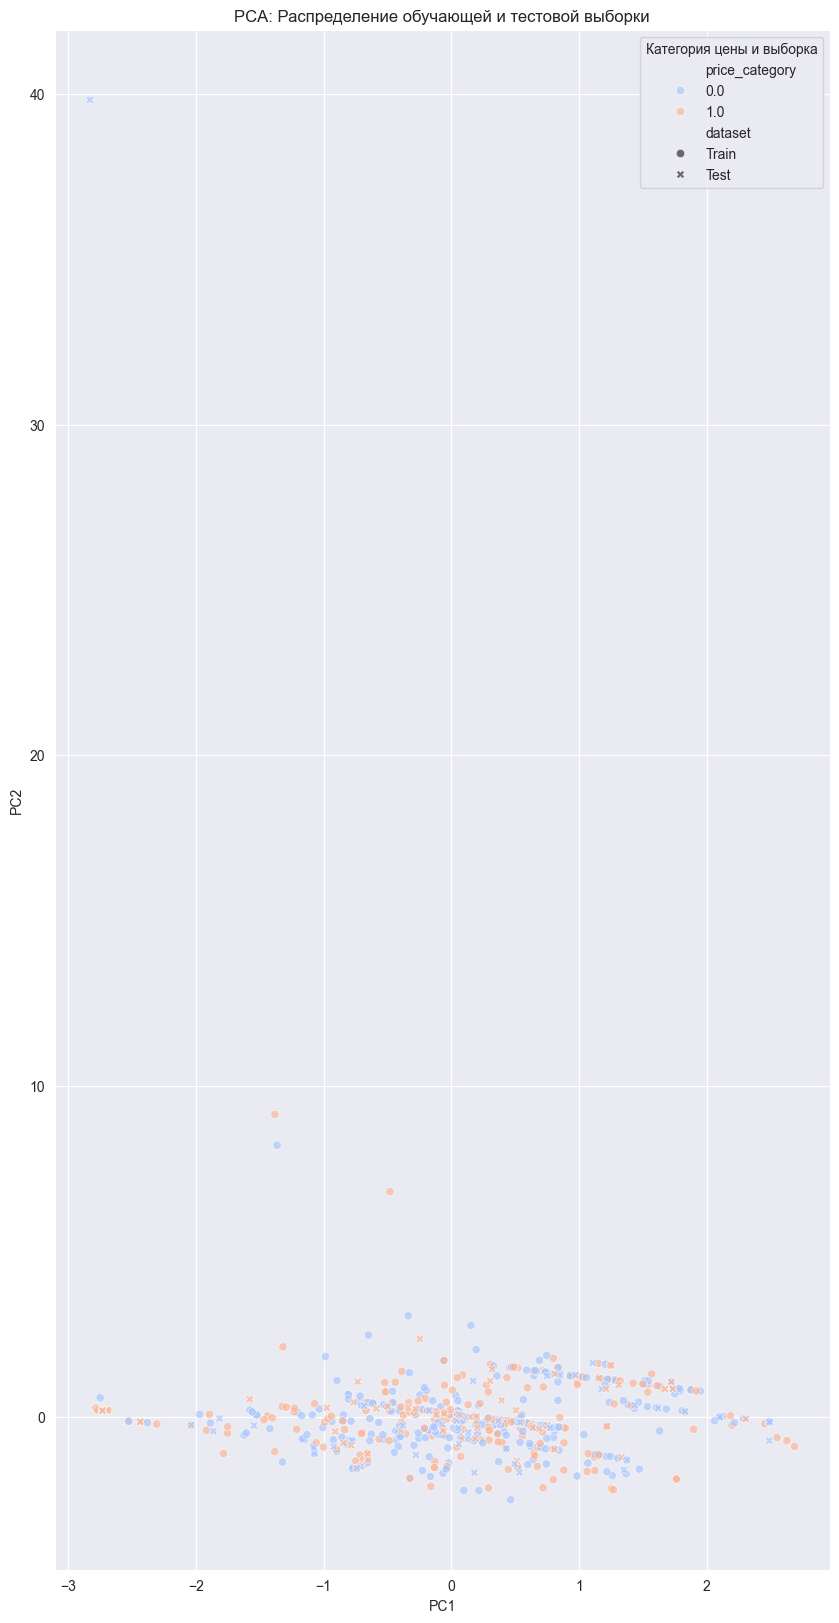

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# разделяем данные на обучающую и тестовую выборки

scaler = StandardScaler()
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
X_test_pca = pca.transform(scaler.transform(X_test))
# используем рса, чтобы визуализировать

train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
train_df['price_category'] = y_train
train_df['dataset'] = 'Train'

test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_df['price_category'] = y_test
test_df['dataset'] = 'Test'

combined_df = pd.concat([train_df, test_df])

plt.figure(figsize=(10, 20))
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='price_category', style='dataset', palette='coolwarm', alpha=0.7)
plt.title('PCA: Распределение обучающей и тестовой выборки')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Категория цены и выборка')
plt.show()
# строим график

In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# параметры для RandomForest

rf = RandomForestClassifier(random_state=42)
# создание модели

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


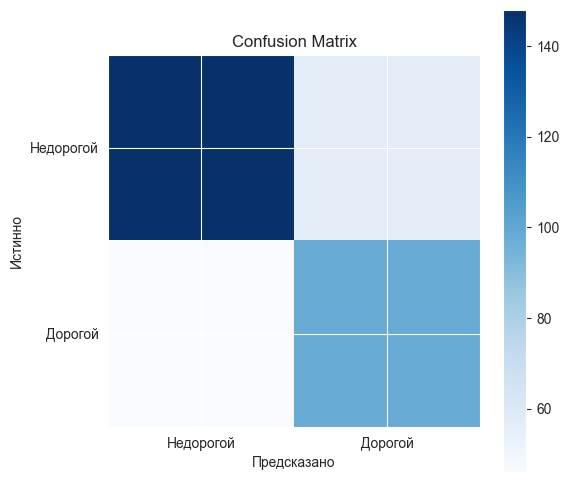

In [104]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Недорогой', 'Дорогой'])
plt.yticks(np.arange(2), ['Недорогой', 'Дорогой'])
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()
# строим матрицу ошибок

In [105]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

class MyRandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X_train, y_train):
        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=42)
            tree.fit(X_resampled, y_resampled)
            
            self.trees.append(tree)

    def predict(self, X_test):
        predictions = np.zeros((self.n_estimators, X_test.shape[0]))
        for i, tree in enumerate(self.trees):
            predictions[i] = tree.predict(X_test)

        final_predictions = [np.bincount(predictions[:, i].astype(int)).argmax() for i in range(X_test.shape[0])]
        return np.array(final_predictions)

my_rf = MyRandomForest(n_estimators=200, max_depth=20)
my_rf.fit(X_train, y_train)
y_pred_my_rf = my_rf.predict(X_test)

accuracy_my_rf = accuracy_score(y_test, y_pred_my_rf)
print(f'Accuracy на тестовых данных (моя модель): {accuracy_my_rf:.4f}')
# своя модель 

Accuracy на тестовых данных (моя модель): 0.6667


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовых данных (готовая модель): {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy на тестовых данных (готовая модель): 0.7069
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       204
           1       0.64      0.68      0.66       144

    accuracy                           0.71       348
   macro avg       0.70      0.70      0.70       348
weighted avg       0.71      0.71      0.71       348

